# K-NN Classification

### E-postaların spam olup olmadığını tespit etmek için bir K-en yakın komşular sınıflandırma modeli kuracağız.

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings

In [31]:
warnings.filterwarnings('ignore')

In [32]:
# Veri setini oluşturalım.
np.random.seed(42)

# Metinlerin listesi
texts = [
    "Bu bir spam e-postasıdır",
    "Bu bir spam değildir",
    "Bir kampanya duyurusu",
    "Bugün toplantı var",
    "Büyük indirimler burada",
    "Bir iş teklifi",
    "Bir indirim kodu",
    "Bugün son gün",
    "Yeni ürünlerimiz çıktı",
    "Son fırsat"
]

# Etiketlerin listesi
labels = ["spam", "spam olmayan", "spam", "spam olmayan", "spam",
          "spam olmayan", "spam", "spam olmayan", "spam olmayan", "spam"]

data = list(zip(texts, labels))
data = pd.DataFrame(data=data, columns=['Metin', 'Etiket'])
data.head()

,Metin,Etiket
0,Bu bir spam e-postasıdır,spam
1,Bu bir spam değildir,spam olmayan
2,Bir kampanya duyurusu,spam
3,Bugün toplantı var,spam olmayan
4,Büyük indirimler burada,spam


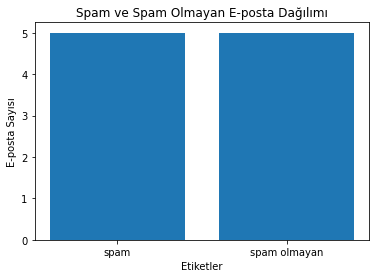

In [33]:
label_counts = data['Etiket'].value_counts()
plt.bar(label_counts.index, label_counts.values)
plt.title('Spam ve Spam Olmayan E-posta Dağılımı')
plt.xlabel('Etiketler')
plt.ylabel('E-posta Sayısı')
plt.show()

# Model

In [34]:
# Metinleri vektörleştirmek için TF-IDF dönüşümünü kullanalım.
vectorizer = TfidfVectorizer()

# Bağımlı ve bağımsız değişkeni oluşturalım.
X = vectorizer.fit_transform(data['Metin'])
y = data['Etiket'].values
print(X[0:2])

  (0, 14)	0.5978349209257247
  (0, 16)	0.5082143009723982
  (0, 0)	0.35500683922426896
  (0, 1)	0.5082143009723982
  (1, 5)	0.5978349209257247
  (1, 16)	0.5082143009723982
  (1, 0)	0.35500683922426896
  (1, 1)	0.5082143009723982


In [35]:
# eğitim ve test setlerini ayıralım.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Modeli oluşturalım ve eğitelim.
model = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

In [37]:
# Tahmin yapalım.
predict = model.predict(X_test)

In [38]:
# Modeli değerlendirelim.
accuracy = accuracy_score(y_test, predict)
confusion = confusion_matrix(y_test, predict)
report = classification_report(y_test, predict)

print('Accuracy Score: ', accuracy, '\n')
print('Confusion Matrix:\n', confusion, '\n')
print('Classification Report:\n', report, '\n')

Accuracy Score:  0.5 

Confusion Matrix:
 [[0 0]
 [1 1]] 

Classification Report:
               precision    recall  f1-score   support

        spam       0.00      0.00      0.00         0
spam olmayan       1.00      0.50      0.67         2

    accuracy                           0.50         2
   macro avg       0.50      0.25      0.33         2
weighted avg       1.00      0.50      0.67         2
 



In [39]:
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

In [40]:
# Model Tuning
params = {
    'n_neighbors': [1, 3, 5, 7],
}

grid = GridSearchCV(estimator=model, param_grid=params, cv=5).fit(X_train, y_train)

best_params = grid.best_params_
best_score = grid.best_score_

print('Best Parameters: ', best_params)
print('Best Score: ', best_score)

Best Parameters:  {'n_neighbors': 3}
Best Score:  0.6


### Model tuning işleminde elde ettiğimiz parametreleri kullanarak modelimizi tekrar oluşturalım.

In [41]:
model = KNeighborsClassifier(**best_params).fit(X_train, y_train)
predict = model.predict(X_test)
accuracy = accuracy_score(y_test, predict)
print('Accuracy Score: ', accuracy)

Accuracy Score:  0.5


In [42]:
predict

array(['spam olmayan', 'spam'], dtype=object)

In [43]:
y_test

array(['spam olmayan', 'spam olmayan'], dtype=object)

In [44]:
# Model Doğrulama
scores = cross_val_score(model, X, y, cv=5)
print('Cross Valudation Score: ', scores)
print('Mean Cross Valudation Score: ', scores.mean())

Cross Valudation Score:  [0.5 1.  0.  0.5 0.5]
Mean Cross Valudation Score:  0.5


# Tahmin

In [45]:
user_input = ['Büyük indirimlerle dolu bir kampanya']

vector = vectorizer.transform(user_input)
prediction = model.predict(vector)
print('Guess: ', prediction)

Guess:  ['spam']


# Sonuç

### Üzerinde çalıştığımız veri setini kendimiz oluşturduk. Bu yüzden gerçek hayat senaryosunu temsil etmez. Amacımız K-NN sınıflandırma algoritmasını ve hiperparametrelerini gözlemleyip, pratik yapmaktır.